
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Tuesday, September 17 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

## Gabriel James
### GDJ337

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so,  please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise. 


## Answer




   When I was working as a data analyst at my most recent company, which dealt in single family rental real estate, I was tasked with providing analytics assistance to our VP of customer service, who was trying to improve resident Move In Success (MIS).  MIS was a binary variable (success or failure) that depended on the number of work orders a resident submitted in the first 30 days after move in and on the total repair cost of those work orders.  The assumption was that a resident who had a successful MIS was more likely to renew their lease later.  I was tasked with creating visualizations and crosstabs that would allow our resident support teams to address at risk properties (by consolidating work orders or even by asking residents not to submit work orders until after 30 days of move in (not very ethical)).

   We had dedicated multiple analysts and entire teams of people to addressing this problem, but no one stopped to consider if Move In Success actually influenced residents' willingness to renew (a chi-square test showed there was no evidence of a relationship between the two).  I believe this falls into "Solve the Wrong Problem."  We had dedicated company resources toward a metric that, in reality, had little to no bearing on the company's success and even did wrong by our residents.

# Question 2: MLE Estimate (5+10+10 points)

Consider a coin tossing experiment where a biased coin is tossed repeatedly for $n$ times with independence in successive tosses. 
If we record the outcome of each toss as $X_{i}$, for $i \in \{1,2,3,....,n\}$ as follows

$  
X_{i} = 
     \begin{cases}
       \text{1,} &\quad\text{if $i^{th}$ toss results in $Heads$,}\\
       \text{0,} &\quad\text{otherwise.} \\ 
     \end{cases}
$

then $X_{1}, X_{2}, .... X_{n}$ will be a sequence of $0$'s and $1$'s. Assume that for this coin $P(Heads) = p$, which of course is not known to the experimenter. 

1. The log-likelihood function of the observations, as discussed in the class, denotes the probability of occurrence of the observations. Write the log-likelihood function for the set of observations $X_{1}, X_{2}, .... X_{n}$. 

2. Compute an MLE estimate of $p$.

3. Check if the obtained estimate is unbiased.


![title](IMG_3531.jpg)

## Answer



# Question 3: Multiple Linear Regression in Python (30 pts)

Use the following code to import the California housing prices dataset and linear models in python. The dataset is taken from https://www.kaggle.com/camnugent/california-housing-prices/version/1. I have removed the categorical variables and rows with missing variables to make it easier to run the models. 


In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None


train_df = pd.read_csv("reduced_data.csv")
X = train_df.drop(['median_house_value'],axis=1)
Y = train_df['median_house_value']

a. (2 pts) Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set, using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with test_size = 0.30 and random_state = 11. Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MAE values thus obtained.

d.  (5 pts) Calculate the pearson correlation matrix of the independent variables in the training set (you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)). Report the variables which have magnitude of correlation greater than 0.9 w.r.t the variable 'households'. 

e.  (6 pts) Add the following independent variables to both train and test sets:
1. average_bedrooms = total_bedrooms/households
2. average_rooms = total_rooms/households
3. average_population = total_rooms/households

Recalculate the correlation matrix. What do you observe about the correlation values of the above new variables?

f. (5 pts) Fit an MLR on the new train data (with additional independent variables) and report the MAE on the new train and test sets.

## Answer

## (a)

In [3]:
print(X.shape)
X.head()

(20433, 8)


pandas.core.frame.DataFrame

## (b)

In [3]:
b = linear_model.LinearRegression()

print(b.fit(X,Y).coef_)

b.fit(X, Y)
Y_pred = b.predict(X)
print()
print("MAE: ", mean_absolute_error(Y, Y_pred))


[-4.27301205e+04 -4.25097369e+04  1.15790031e+03 -8.24972507e+00
  1.13820707e+02 -3.83855780e+01  4.77013513e+01  4.02975217e+04]

MAE:  50799.6307289529


## (c)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 11)

lm = linear_model.LinearRegression().fit(X_train, Y_train)
lm_pred_train = lm.predict(X_train)
print("Train MAE: ", mean_absolute_error(Y_train, lm_pred_train))

lm_pred_test = lm.predict(X_test)
print("Test MAE: ", mean_absolute_error(Y_test, lm_pred_test))





Train MAE:  50749.10314465295
Test MAE:  50916.74299435109


The Train MAE is slightly lower than Test MAE.  This is to be expected, since the model learned on the training dataset.

The Train and Test MAE are fairly close, so it doesn't seem that the model is overfit.

## (d)

In [5]:
train_df.corr()['households'][abs(train_df.corr()['households'])>.9].index.values

array(['total_rooms', 'total_bedrooms', 'population', 'households'],
      dtype=object)

Independent variables having correlation greater than 0.9 w.r.t 'households': 



total_rooms,
total_bedrooms,
population,
households

## (e)

In [6]:
#I believe there is a type in the instructions of e
#I have set average population = population / households

train_df['average_bedrooms'] = train_df['total_bedrooms']/train_df['households']
train_df['average_rooms'] = train_df['total_rooms']/train_df['households']
train_df['average_population'] = train_df['population']/train_df['households']

train_df.corr()
#average_bedrooms is highly correlated with average_rooms

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,average_bedrooms,average_rooms,average_population
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.013402,-0.027307,0.002304
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,0.070025,0.106423,0.002522
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.077918,-0.153031,0.013258
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.029373,0.133482,-0.024596
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.045887,0.001538,-0.028355
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.066510,-0.071898,0.070062
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.055158,-0.080165,-0.027336
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.062299,0.325307,0.018894
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,-0.046739,0.151344,-0.023639
average_bedrooms,0.013402,0.070025,-0.077918,0.029373,0.045887,-0.066510,-0.055158,-0.062299,-0.046739,1.000000,0.848616,-0.006179


Observation: 

average_bedrooms is highly correlated (0.8486) with average_rooms, but average_population does not seem to be correlated with either average_bedrooms or average_population.

## (f)

In [7]:
X = train_df.drop(['median_house_value'],axis=1)
Y = train_df['median_house_value']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 11)

lm = linear_model.LinearRegression().fit(X_train, Y_train)
lm_pred_train = lm.predict(X_train)
print("Train MAE: ", mean_absolute_error(Y_train, lm_pred_train))

lm_pred_test = lm.predict(X_test)
print("Test MAE: ", mean_absolute_error(Y_test, lm_pred_test))

Train MAE:  50474.268791457886
Test MAE:  50783.974603927876


# Question 4: Ridge and Lasso Regression (30 points)


Using the same data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Use the same train and test data with additional augmented columns from before. Scale the data so that each of the dependent variables have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

In [83]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import numpy as np

X = train_df.drop(['median_house_value'], axis=1)
Y = train_df['median_house_value']


X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, test_size = 0.3, random_state = 11)

scaler = preprocessing.StandardScaler().fit(X_tr)
scaler.transform(X_tr)
scaler.transform(X_te)

alphas = 10**np.linspace(10,-2,100)*0.5

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

5) Why did we have to scale the data before regularization? (5pts)


## Answer



## 1

I was having trouble using the KFold function.  When I used the scale function on the entire feature set, it ran correctly, but when I used StandardScaler on the entire or training feature set, I received an error I couldn't solve.

I used GridSearchCV instead to circumvent this.

In [ ]:
#code I was trying to run:
'''
cv = KFold(n_splits=5, random_state=0)

l_MAE = []
l_alpha = []

for a in alphas:
    
    
    sum_MAE = 0
    clf = linear_model.Lasso(alpha=a)
    for train_index, test_index in cv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        clf = clf.fit(X_train, Y_train)
        clf_pred = clf.predict(X_test)
        sum_MAE = sum_MAE + mean_absolute_error(Y_test, clf_pred)
    
    avg_MAE = sum_MAE/5
    l_MAE.append(avg_MAE)
    l_alpha.append(a)
    

q = pd.DataFrame(
    {'MAE': l_MAE, 
     'alpha': l_alpha
    })

q.sort_values(by='MAE').head(1)


'''

In [96]:
lasso_lm = GridSearchCV(Lasso(), {'alpha': alphas}, scoring='neg_mean_squared_error', cv=5)
lasso_lm.fit(X_tr, Y_tr)

print("Lasso: ")
print(lasso_lm.best_params_)
print("MAE: ",-1*lasso_lm.best_score_)

Lasso: 
{'alpha': 266.8349615603151}
MAE:  4823099636.200391


In [97]:
ridge_lm = GridSearchCV(Ridge(), {'alpha': alphas}, scoring='neg_mean_squared_error', cv=5)
ridge_lm.fit(X_tr, Y_tr)

print("Ridge: ")
print(ridge_lm.best_params_)
print("MAE: ",-1*ridge_lm.best_score_)

Ridge: 
{'alpha': 115.50648500415791}
MAE:  4818150947.238036


## 2

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


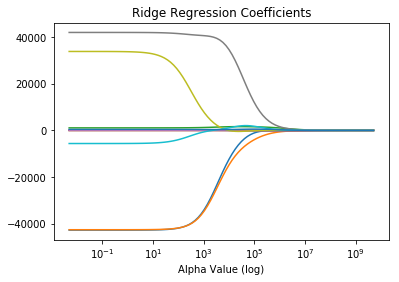

In [113]:
coefficients = []

for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X_tr, Y_tr)
    coefficients.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefficients)
ax.set_xscale('log')
plt.title('Ridge Regression Coefficients')
plt.xlabel('Alpha Value (log)')
plt.show()

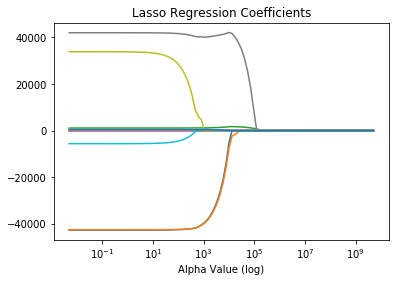

In [114]:
coefficients = []

for a in alphas:
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(X_tr, Y_tr)
    coefficients.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefficients)
ax.set_xscale('log')
plt.title('Lasso Regression Coefficients')
plt.xlabel('Alpha Value (log)')
plt.show()

As the regularization value (alpha value) increases, more predictor variable coefficients are brought closer to zero.

The minimization function wants to reduce the error in the regression and the sum of the coefficients (weighted by the regularization value).  Increasing alpha forces the regression to prioritize the features that account for the most variance in the response variable.

## 3

In [93]:
#Linear Regresion
lm = linear_model.LinearRegression().fit(X_tr, Y_tr)
lm_pred_test = lm.predict(X_te)
print("Test MAE: ", mean_absolute_error(Y_te, lm_pred_test))

Test MAE:  50783.974603927876


In [95]:
#Lasso Regression
lm_lasso = linear_model.Lasso(alpha=266.835).fit(X_tr, Y_tr)
lm_lasso_pred_test = lm_lasso.predict(X_te)
print("Test MAE: ", mean_absolute_error(Y_te, lm_lasso_pred_test))

Test MAE:  50816.66772770702


In [98]:
#Ridge Regression
lm_ridge = linear_model.Ridge(alpha=115.506).fit(X_tr, Y_tr)
lm_ridge_pred_test = lm_ridge.predict(X_te)
print("Test MAE: ", mean_absolute_error(Y_te, lm_ridge_pred_test))

Test MAE:  50784.915158724296


## 4

In [121]:
model_cv = linear_model.LassoCV(alphas=None, cv=10, max_iter=10000).fit(X_tr, Y_tr)



In [122]:
print("Alpha: ", model_cv.alpha_)

Alpha:  33667.33125338168


In [124]:
lm_lasso = linear_model.Lasso(alpha=33667.33).fit(X_tr, Y_tr)

lm_lasso_pred_tr = lm_lasso.predict(X_tr)
print("Train MAE: ", mean_absolute_error(Y_tr, lm_lasso_pred_tr))

lm_lasso_pred_test = lm_lasso.predict(X_te)
print("Test MAE: ", mean_absolute_error(Y_te, lm_lasso_pred_test))

Train MAE:  59974.967255430165
Test MAE:  59638.11860469278


In [125]:
print(lm_lasso.coef_)

[-0.00000000e+00 -0.00000000e+00  1.51789396e+03 -1.29210071e+00
 -5.62929393e+00 -4.78896868e+01  1.74332835e+02  3.39063234e+04
 -0.00000000e+00  0.00000000e+00  0.00000000e+00]


## 5

Because Lasso and Ridge Regression use a penalizitation function on the coefficients of the model, if the features aren't appropriately scaled, the regularization will affect some features disproportionately.

For instance, if a predictor variable that has really small values has a coefficient that is really large, the regularization will affect that predictor variable much more than a variable with a small coefficient (due to its values being relatively large).  To understand which predictors are most important in a regression, it is important that the regularization behaves consistently among all predictor variables.


# Question 5 (5pts)

How do you think the performance of your model varies in the train and test set as you increase(decrease) the number of examples in the training dataset? Explain why does it change in a particular way.

### Answer

Assume that the new records in the training set are as representative of the population as the starting sample. 

As we increase the number of examples in the training set, the performance of the model on the training set would likely decrease.  If the model is overfit, adding more records will decrease the performance of the model.  If the model is not overfit, then I would expect no change in the performance of the model.

The performance of the model on the test set would either increase or stay the same.  If the model being used cannot capture the behavior of the data, adding more records will not improve its performance.  However, if the model is appropriate for the data, adding more data can narrow confidence intervals and standard error.